#Import Dataset

In [4]:
import io

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('Twitter_Data.csv')

#View Dataset

In [5]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
data.shape

(162980, 2)

#Data preprocessing
 1. Raw data preprocessing
 2. Counting the type of sentiments (positive,neutral,negative)
 3.  

In [7]:
data.category.unique()

array([-1.,  0.,  1., nan])

In [8]:
data.isna().sum()

clean_text    4
category      7
dtype: int64

In [9]:
data[data['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [10]:
data[data['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [11]:
data.drop(data[data['clean_text'].isna()].index, inplace=True)
data.drop(data[data['category'].isna()].index, inplace=True)

In [12]:
sentiment_map={-1:'negative',1:'positive',0:'neutral'}
data.insert(2,'sentiment',[sentiment_map[s] for s in data.category],True)
#data['sentiment_int']=[sentiment_map[s] for s in data.sentiment]

data.head()

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,negative
1,talk all the nonsense and continue all the dra...,0.0,neutral
2,what did just say vote for modi welcome bjp t...,1.0,positive
3,asking his supporters prefix chowkidar their n...,1.0,positive
4,answer who among these the most powerful world...,1.0,positive


In [13]:
#labeling
reviews = np.array(data['clean_text'])[:]
labels = np.array(data['sentiment'])[:]

In [14]:
from collections import Counter

Counter(labels)

Counter({'positive': 72249, 'neutral': 55211, 'negative': 35509})

Here we remove all the special charecters(@,#,$ etc), punctuations and URL from all the esteemed tweets.


Next, we have given the token id's to each of the words in the tweet. Then we vectorize all the tokens.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import csv

# Data Cleaning
# lowercase, remove url, html, punctuations, retweet
import preprocess_kgptalkie as ps
data['clean_text'] = data['clean_text'].apply(lambda x: x.lower())
data['clean_text'] = data['clean_text'].apply(lambda x: ps.remove_urls(x))
data['clean_text'] = data['clean_text'].apply(lambda x: ps.remove_html_tags(x))
data['clean_text'] = data['clean_text'].apply(lambda x: ps.remove_special_chars(x))
data['clean_text'] = data['clean_text'].apply(lambda x: ps.remove_rt(x))

def preProcessor(Tweet):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', Tweet)
    text=re.sub(r'['+punctuation+']',' ',Tweet)
    text=re.sub(r'#(\w+)',' ',Tweet)
    text=re.sub(r'@(\w+)',' ',Tweet)
    #print(token.tokenize(text))
    return Tweet

# token=RegexpTokenizer(r'\w+')
# cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
#text_counts=cv.fit_transform(data['Tweet'])
# text_counts=cv.fit_transform(data['clean_text'].values.astype('U'))

c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\preprocess_kgptalkie\utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


Here we split the dataset in test and train part.We use train dataset for training purposes and test dataset for checking the accuracy of our model.

In [45]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(data['clean_text'],data['sentiment'],test_size=0.3)

#Naive Bayes

 Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.


Bayes Theorem:
<br>
<br>
<img src="https://miro.medium.com/max/510/1*tjcmj9cDQ-rHXAtxCu5bRQ.png" style="max-width:420px; margin-bottom:32px"/>
<br>
<br>

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

In [47]:
#Ber_NB
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import *
from sklearn import metrics

from nltk.corpus import stopwords

stop_words = stopwords.words('english')  # Get stopwords as a list
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,stop_words=stop_words)),  # Convert text to TF-IDF features with stopwords
    ('clf', BernoulliNB())  # Random Forest classifier
])

pipeline.fit(x_train,y_train)
pipeline.fit(x_train,y_train)
pred=pipeline.predict(x_test)
metrics.accuracy_score(y_test, pred)


0.7920271624634391

#SVM
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:
<br>
<br>
<img src="https://miro.medium.com/max/640/1*irg_jfdAar9gfe0j-Q04vQ.png" style="max-width:420px; margin-bottom:32px"/>
<br>
<br>

In [48]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

from nltk.corpus import stopwords

stop_words = stopwords.words('english')  # Get stopwords as a list
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,stop_words=stop_words)),  # Convert text to TF-IDF features with stopwords
    ('clf', LinearSVC())  # Random Forest classifier
])

pipeline.fit(x_train,y_train)
pipeline.fit(x_train,y_train)
pred=pipeline.predict(x_test)
metrics.accuracy_score(y_test, pred)

c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.8962999325029146

We can get the better analysis from this confusion matrix.In this matrix if the diagonal elements are higher, the model will be more efficient.

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
#linear
from sklearn.svm import LinearSVC
import sklearn
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)
metrics.accuracy_score(y_test, pred)
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\91975\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KeyboardInterrupt: 

In [49]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

from nltk.corpus import stopwords

stop_words = stopwords.words('english')  # Get stopwords as a list
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,stop_words=stop_words)),  # Convert text to TF-IDF features with stopwords
    ('clf', DecisionTreeClassifier())  # Random Forest classifier
])

pipeline.fit(x_train,y_train)
pipeline.fit(x_train,y_train)
pred=pipeline.predict(x_test)
metrics.accuracy_score(y_test, pred)



0.8080423799881369

Confusion matrix, without normalization
[[1728 4385 4520]
 [2641 6910 7014]
 [3591 8861 9241]]
Normalized confusion matrix
[[0.16 0.41 0.43]
 [0.16 0.42 0.42]
 [0.17 0.41 0.43]]


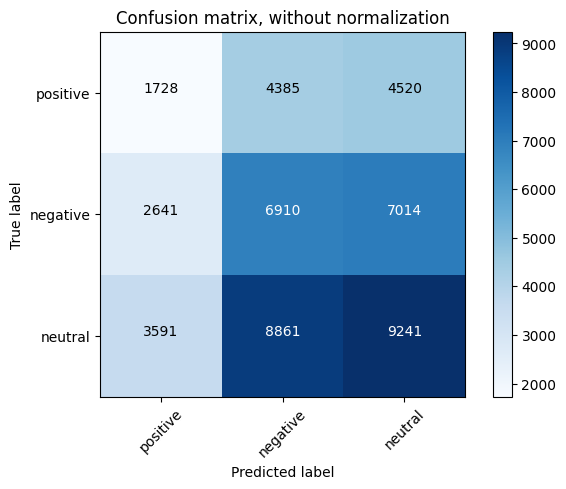

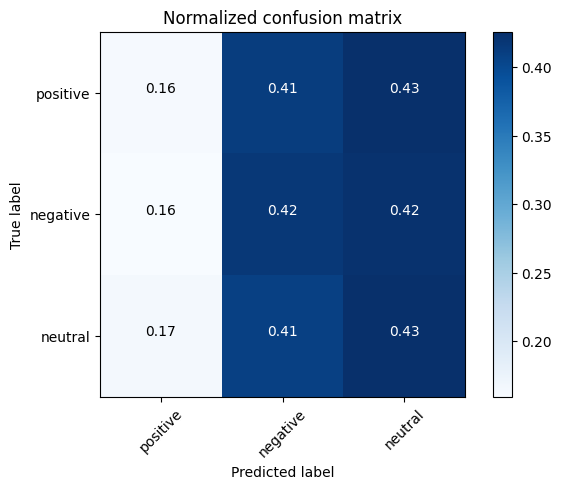

In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [51]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [52]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')  # Get stopwords as a list
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,stop_words=stop_words)),  # Convert text to TF-IDF features with stopwords
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))  # Random Forest classifier
])


In [53]:
# Train the model
pipeline.fit(x_train, y_train)

# Predictions
y_pred = pipeline.predict(x_test)

Accuracy: 0.8571925303225543
Confusion matrix, without normalization
[[ 7262  1349  2022]
 [  138 15946   481]
 [ 1090  1902 18701]]
Normalized confusion matrix
[[0.68 0.13 0.19]
 [0.01 0.96 0.03]
 [0.05 0.09 0.86]]


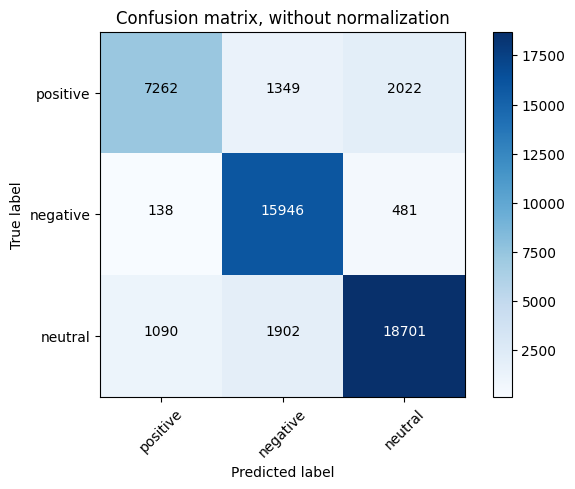

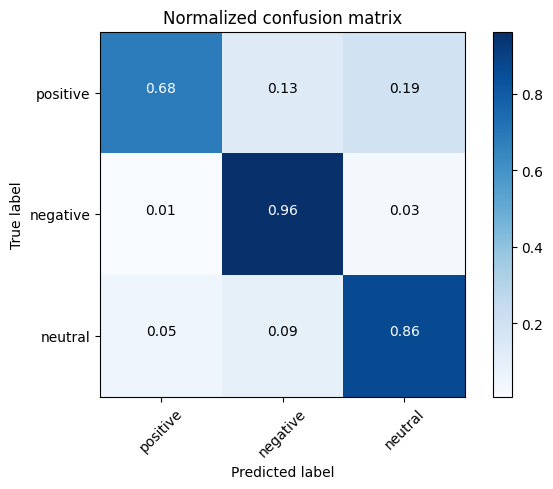

In [54]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [55]:
# Create a DataFrame with predicted labels
results_df = pd.DataFrame({'text': x_test, 'true_label': y_test, 'predicted_label': y_pred})

# Save the DataFrame to a CSV file
results_df.to_csv('predicted_results.csv', index=False)

print("Predicted results saved to 'predicted_results.csv'")

Predicted results saved to 'predicted_results.csv'


In [56]:
import pickle
pickle.dump(pipeline,open("sentiment_ana.pkl",'wb'))